In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


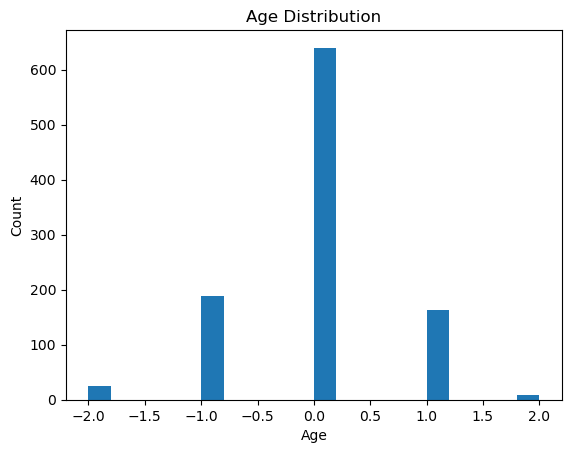

In [10]:
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


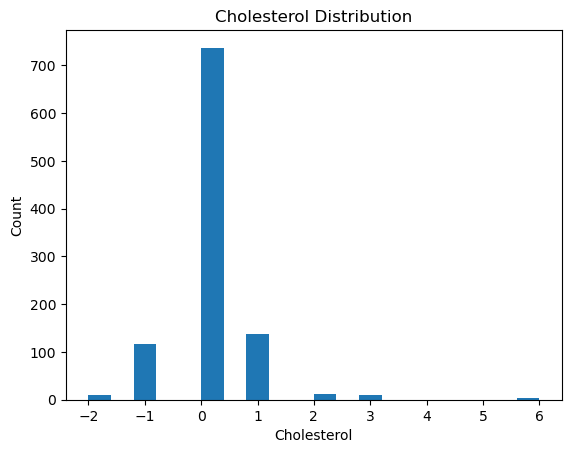

In [11]:
plt.hist(df['chol'], bins=20)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()


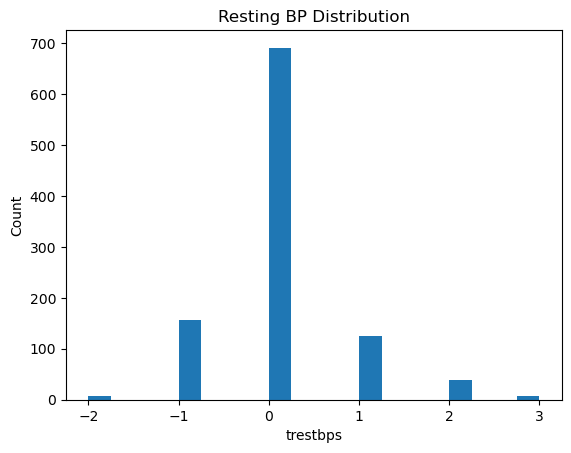

In [13]:
plt.hist(df['trestbps'], bins=20)
plt.title("Resting BP Distribution")
plt.xlabel("trestbps")
plt.ylabel("Count")
plt.show()


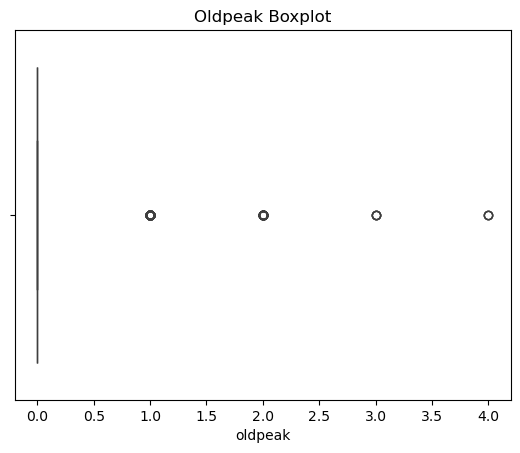

In [14]:
sns.boxplot(x=df['oldpeak'])
plt.title("Oldpeak Boxplot")
plt.show()


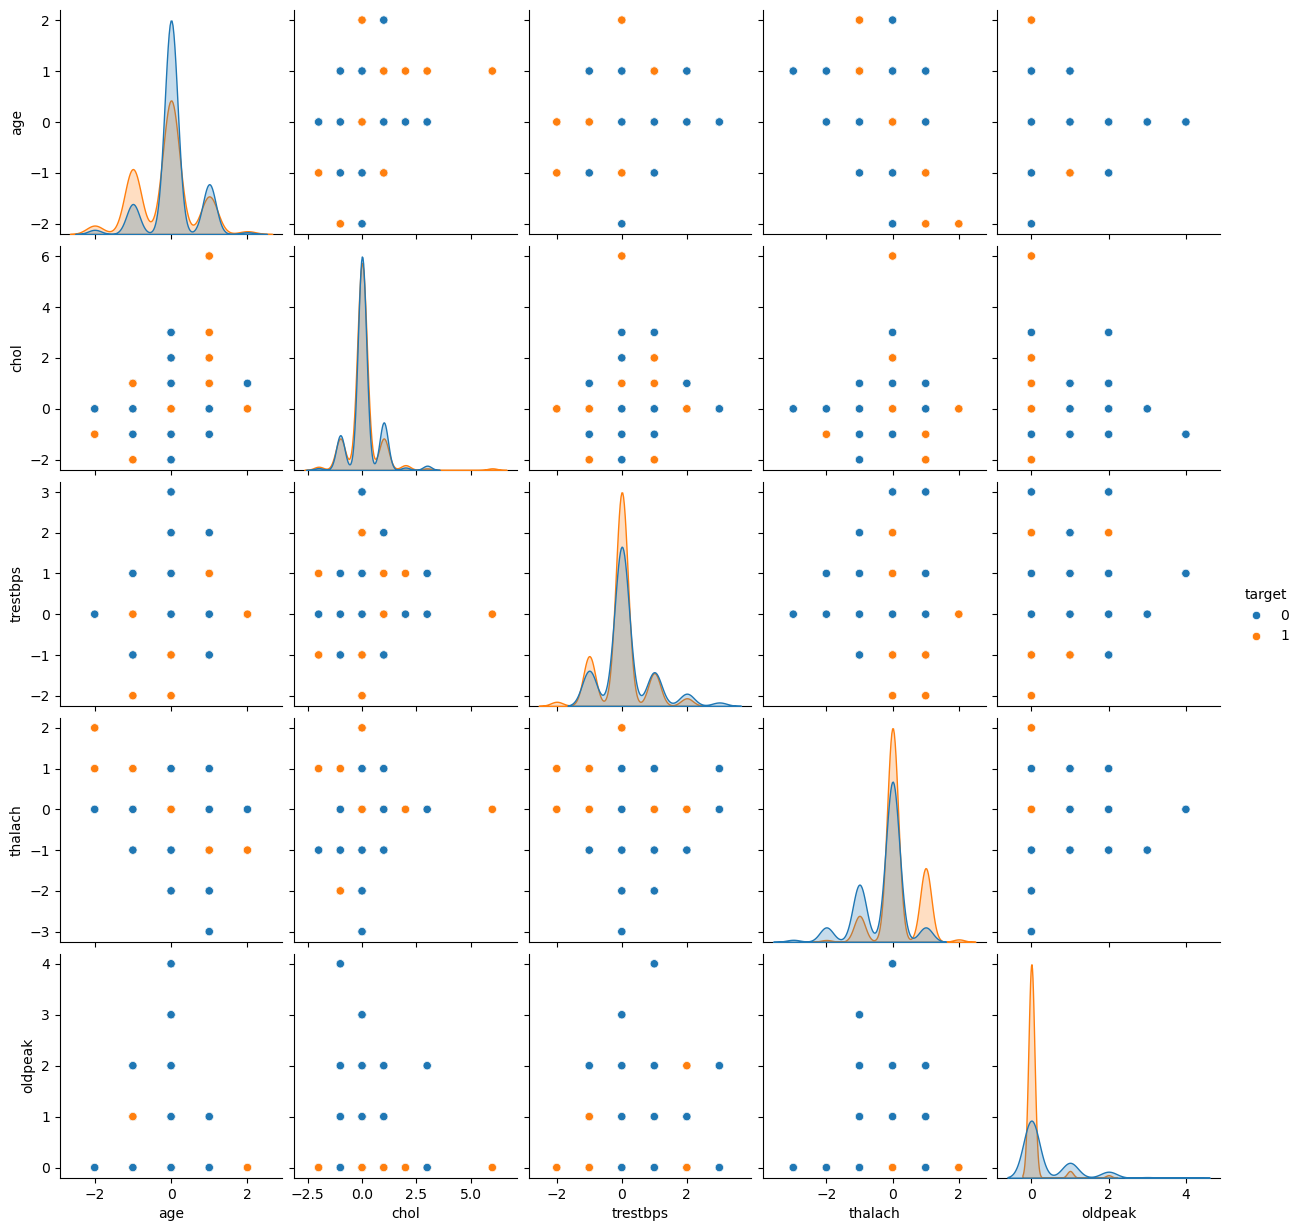

In [16]:
sns.pairplot(df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'target']], 
             hue='target')
plt.show()


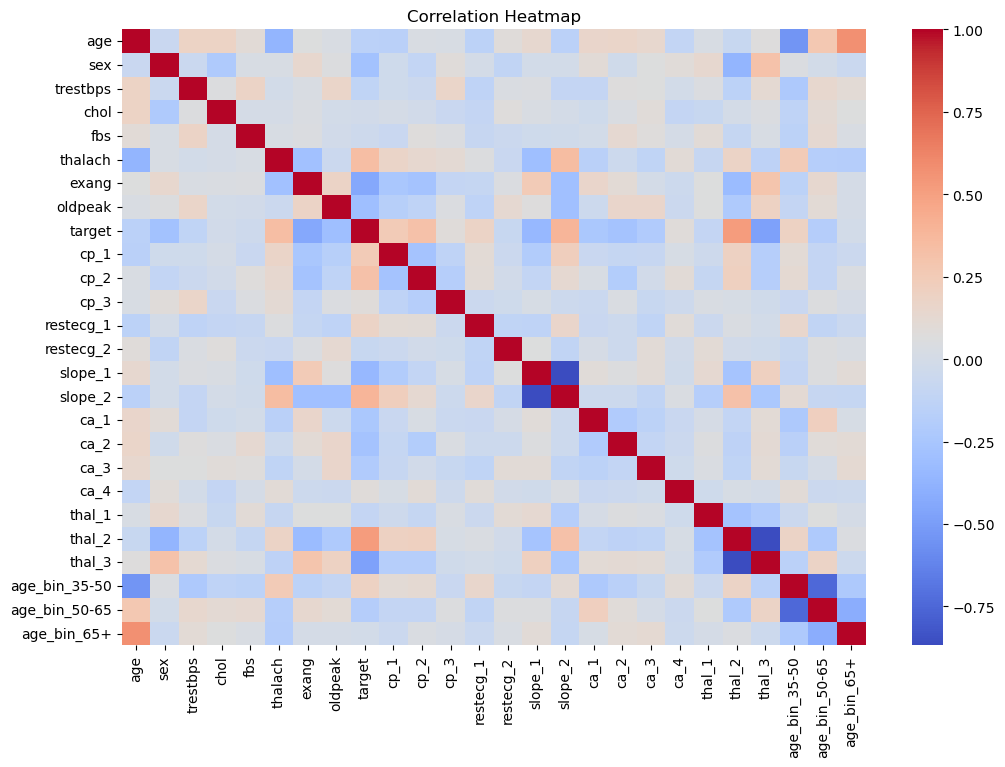

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


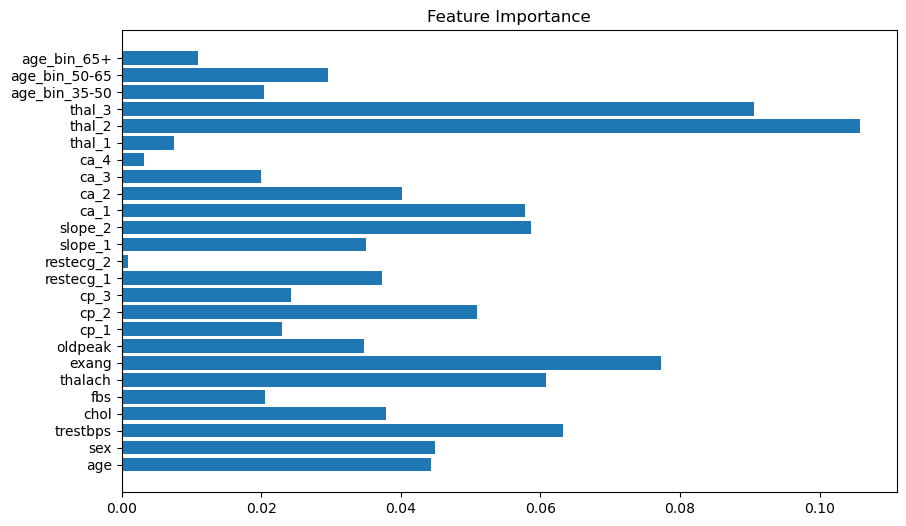

In [18]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("target", axis=1)
y = df["target"]

rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()


In [3]:
df = pd.read_csv("processed_healtcare_data.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("-- Random Forest --")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


-- Random Forest --
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [4]:
import joblib

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save model
joblib.dump(rf, "heart_rf_model.pkl")

print("Model and scaler saved.")


Model and scaler saved.
